In [7]:
import torch
import dgl
import numpy as np
import networkx as nx
import scipy.sparse as sp
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib.plt.pyplot line

UsageError: Line magic function `%matplotlib.plt.pyplot` not found.


In [8]:
class dijkstra:
    def shortest_path(self, graph, start_node, end_node):
        path = [-1] * len(graph)
        for i in range(len(graph)):
            if graph[start_node][i] == inf or graph[start_node][i] == 0:
                path[i] = -1
            else:
                path[i] = start_node
        visited = [start_node]
        rested = [_ for _ in range(len(graph)) if _ != start_node]
        distance = graph[start_node]
        
        while len(rested):
            min_idx = rested[0]
            for i in rested:
                if distance[i] < distance[min_idx]:
                    min_idx = i
            if min_idx == end_node:
                break
            visited.append(min_idx)
            rested.remove(min_idx)
            
            for i in rested:
                if distance[min_idx] + graph[min_idx][i] < distance[i]:
                    distance[i] = distance[min_idx] + graph[min_idx][i]
                    path[i] = min_idx
        return path, distance[end_node]

In [9]:
inf = 10086
graph = [[0, 1, 12, inf, inf, inf],
          [inf, 0, 9, 3, inf, inf],
          [inf, inf, 0, 4, 5, inf],
          [inf, inf, inf, 0, 13, 15],
          [inf, inf, inf ,inf, 0, 4],
          [inf, inf, inf, inf ,inf, 0]]
start_node = 0
end_node = 4
path, distance = dijkstra().shortest_path(graph, start_node, end_node)
print(distance)
print(path)

15
[-1, 0, 1, 1, 2, 3]


In [10]:
edges = set()
v = end_node
while path[end_node] != -1:
    u = path[end_node]
    edges.add((u, v))
    end_node = u
    v = u
# edges = edges[::-1]
print(edges)

{(0, 1), (2, 4), (1, 2)}


[(0, 1, 0), (0, 2, 0), (1, 2, 0), (1, 3, 0), (2, 4, 0), (2, 3, 0), (3, 4, 0), (3, 5, 0), (4, 5, 0)]


{(0, 1): Text(0.2763591244389469, 0.7469414494660807, '1'),
 (0, 2): Text(0.5084298086706343, 0.5288580451288899, '12'),
 (1, 2): Text(0.15923294791551273, 0.35929411604845607, '9'),
 (1, 3): Text(0.0002609816392388914, 0.08394663405939573, '3'),
 (2, 4): Text(-0.07256943288321524, -0.04219932333265289, '5'),
 (2, 3): Text(0.2323316658709262, -0.13413677027779503, '4'),
 (3, 4): Text(-0.23154139915948907, -0.3175468053217132, '13'),
 (3, 5): Text(-0.20378969155573165, -0.7047421261334277, '15'),
 (4, 5): Text(-0.5086907903098731, -0.6128046791882855, '4')}

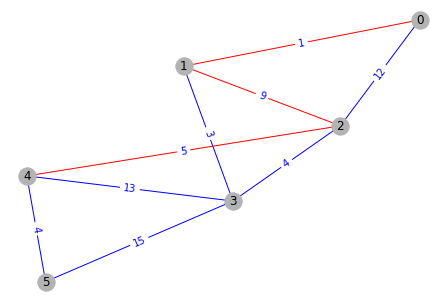

In [11]:
row = np.array([0, 0, 1, 1, 2, 2, 3, 3, 4])
col = np.array([1, 2, 2, 3, 4, 3, 4, 5, 5])
data = np.array([1, 12, 9, 3, 5, 4, 13, 15, 4])
n = len(graph)
sp_mat = sp.coo_matrix((data, (row, col)), shape=(n, n))
G = dgl.from_scipy(sp_mat, eweight_name='w')
# Since the actual graph is undirected, we convert it for visualization
# purpose.
nx_G = G.to_networkx().to_undirected()
cnt = len(row)
edge_color = ['b'] * cnt
print(list(nx_G.edges))
edges_all = list(nx_G.edges)
for i in range(cnt):
    u = edges_all[i][0]
    v = edges_all[i][1]
    if (u, v) in edges:
        edge_color[i] = 'r'
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]], edge_color=tuple(edge_color))
edge_labels = defaultdict(tuple)
for i in range(len(row)):
    edge_labels[(row[i], col[i])] = data[i]
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='b')